### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import KFold,train_test_split,GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


%matplotlib inline

### Load The Dataset and cleaning it 
see if any null values were found or  data type of the column is not correct

In [2]:
df=pd.read_csv('heart.csv')

In [3]:
df.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
print(f"Number of Null Values = {df.isna().sum().sum()}")

print(f"Number of Duplicated Rows = {df.duplicated().sum()}")

Number of Null Values = 0
Number of Duplicated Rows = 1
The history saving thread hit an unexpected error (OperationalError('database or disk is full',)).History will not be written to the database.


- ##### The data is Clean no null value found 
- ##### only one  repeated row were found and 
       - this row will be deleted
- ##### each 0column has it's corrected datatype

## Drop the Duplicated Rows

In [6]:
df[df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [7]:
df[df['age']==38].head(2)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [8]:
df.shape

(303, 14)

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(302, 14)

# Explore The DataSet
### Description of the dataset

In [11]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


- ###### the Standard divination `Age`  column it can be considered small ,that indicates that most of the age in the data set are near 54 years old

- ###### the Standard divination `thalachh`   column is relatively low that indicates that most of this column data point are close to the mean value


- ###### Most of the column in the dataset dose have unique values not continuos data

### Is The Data Correlated to each other  

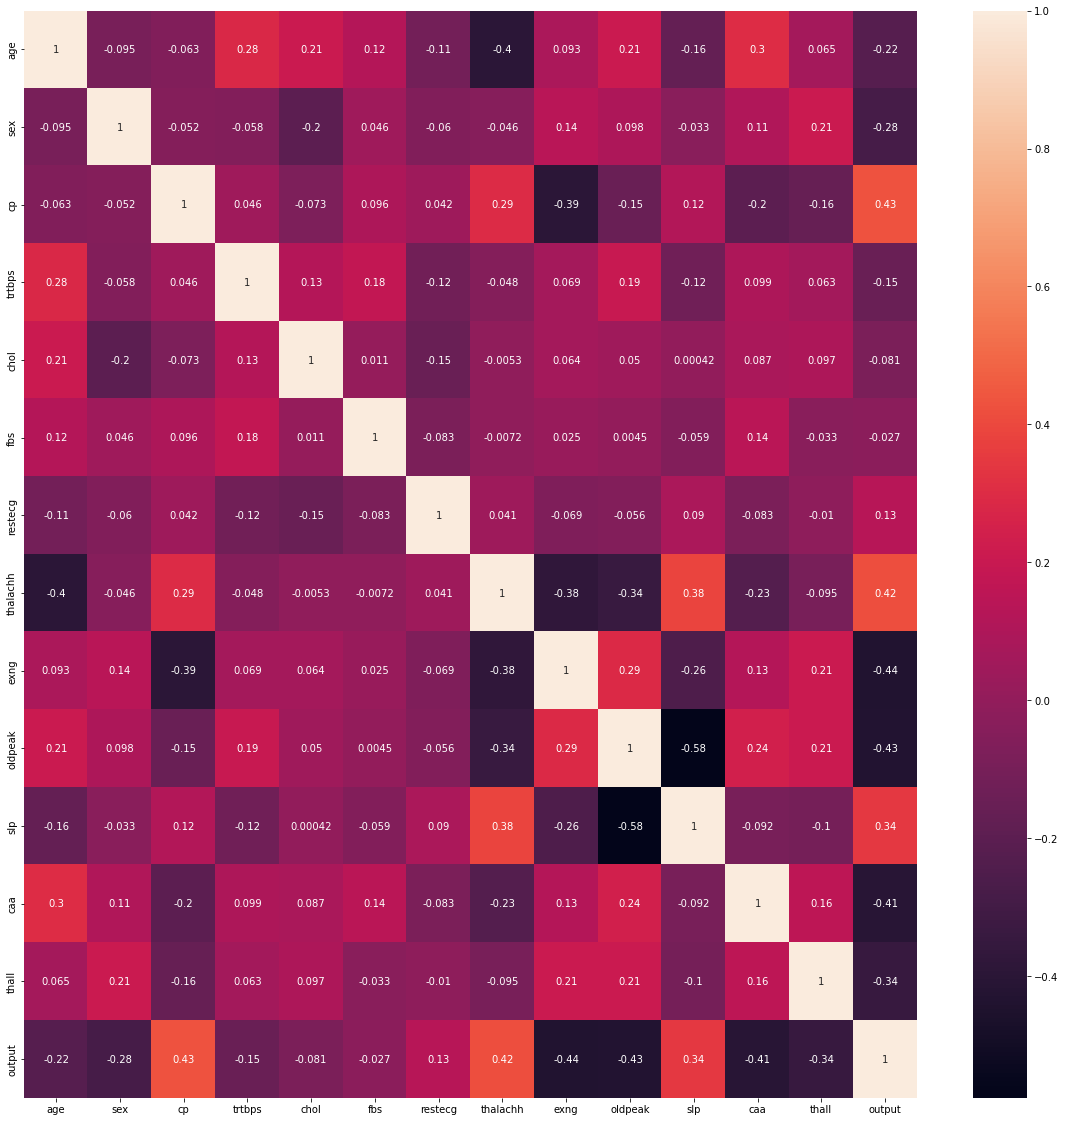

In [12]:
plt.figure(figsize=[20,20])
sns.heatmap(df.corr(),annot=True)

- ###### there is very high corelation between `cp` column and `output`  column
- ###### there is very high corelation between `thalachh` column and `output`  column
- ###### there is very high corelation between `slp` column and `output`  column
- ###### That Means Also, That The Chest pain `cp` can help in detection if the person have A heart diseases or not 
- ###### That Means Also, That The Heart Rate `thalachh` can help in detection if the person have A heart diseases or not 

### What Is the Covariance and Correlation of all the dataset  

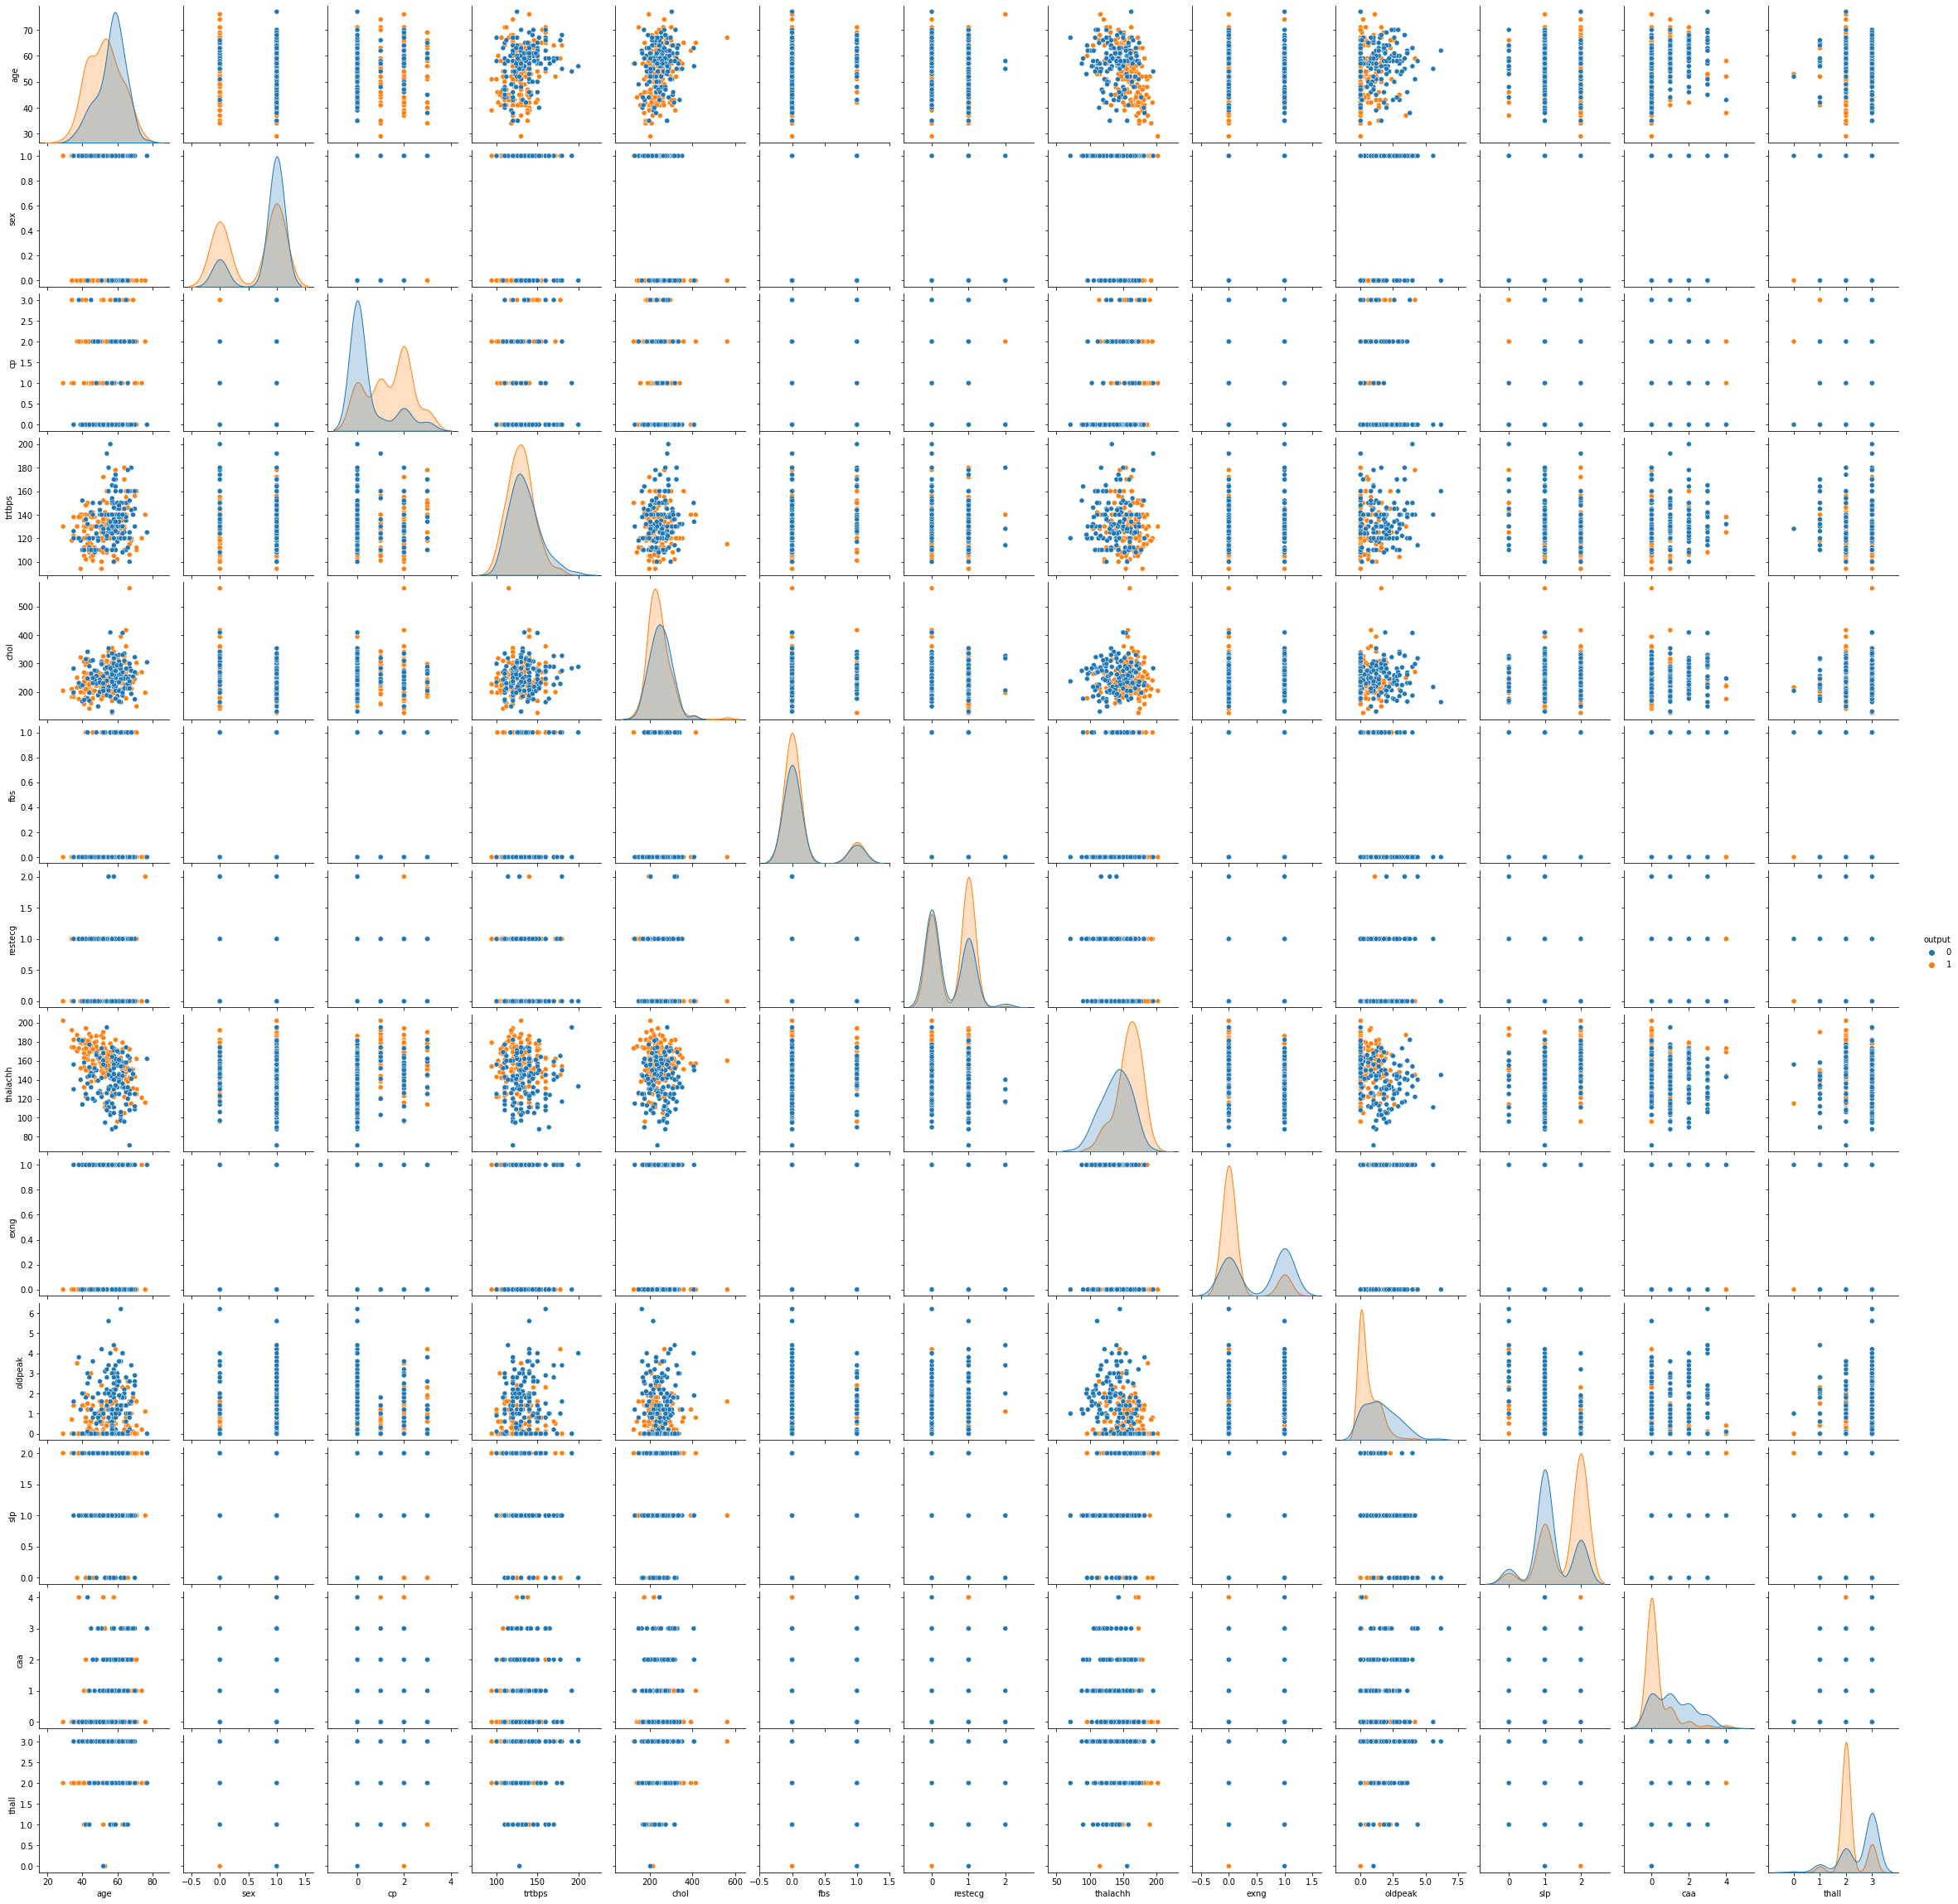

In [159]:
sns.pairplot(df,hue='output')

- ###### The `age` have negative covariance  with  `thalachh`

#### What is the number of Male and Females in the dataset

In [13]:
df['sex'].value_counts()

1    206
0     96
Name: sex, dtype: int64

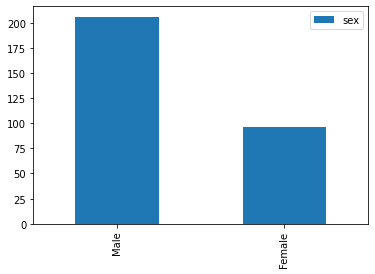

In [14]:
df['sex'].map({1:'Male',0:'Female'}).value_counts().plot(kind='bar',legend=True)


# What is gender that have more Heart disease ?

<Figure size 720x720 with 0 Axes>

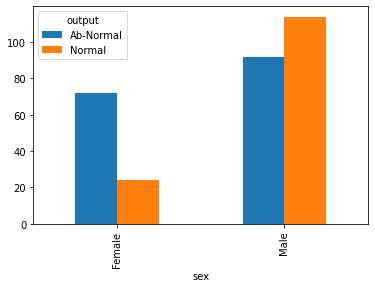

In [15]:
plt.figure(figsize=[10,10],facecolor='black')
pd.crosstab(df['sex'].map({0:'Female',1:'Male'}),df['output'].map({0:'Normal',1:'Ab-Normal'})).plot(kind='bar')

- ###### Most of the patients that have Heart Dieses are `Male`    

# Dose The Heart rate increases with  Higher age ?

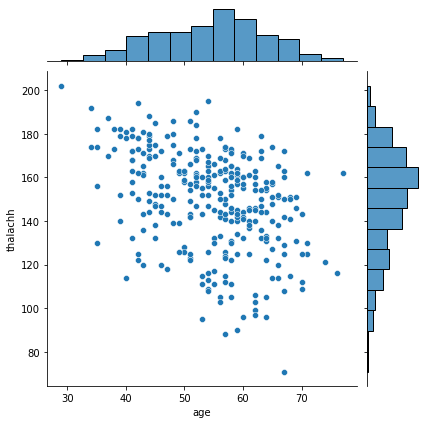

In [16]:
sns.jointplot(x='age',y='thalachh',data=df)

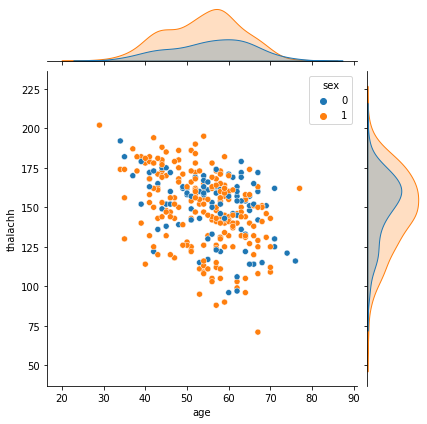

In [17]:
sns.jointplot(x='age',y='thalachh',hue='sex',data=df)

In [18]:
df.groupby(['sex','output'])['thalachh'].mean()

sex  output
0    0         142.416667
     1         154.027778
1    0         138.403509
     1         161.782609
Name: thalachh, dtype: float64

- ###### Higher age number , leads to slow hear rate 
- ###### The Average heart rate for 
    - ###### Women That Have Heart Disease == 154.027778

    - ###### Men   That Have Heart Disease == 161.782609


# Distribution of Age for Male and Female Patients That Have or don't Have Heart Disease?

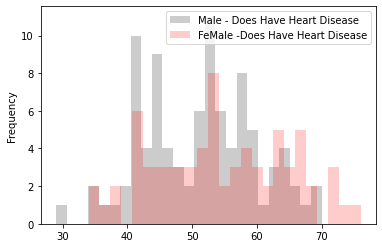

In [19]:
df[(df['sex']==1)&(df['output']==1)]['age'].plot(kind='hist',alpha=0.2,color='k',label='Male - Does Have Heart Disease',bins=25)
df[(df['sex']==0)&(df['output']==1)]['age'].plot(kind='hist',alpha=0.2,color='r',label='FeMale -Does Have Heart Disease',bins=25)

plt.legend()

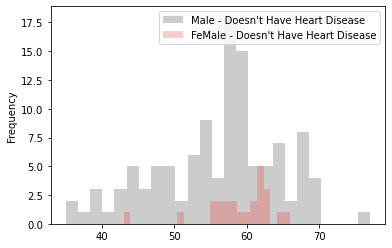

In [20]:
df[(df['sex']==1)&(df['output']==0)]['age'].plot(kind='hist',alpha=0.2,color='k',label="Male - Doesn't Have Heart Disease",bins=25)
df[(df['sex']==0)&(df['output']==0)]['age'].plot(kind='hist',alpha=0.2,color='r',label="FeMale - Doesn't Have Heart Disease",bins=25)

plt.legend()

# Train The Models

In [21]:
def Metrcis(y_pred,y_true,prnt=False):
    'Function  Jst Wrap All the metrics that iam using'
    acc=metrics.accuracy_score(y_true,y_pred)
    f1_score=metrics.f1_score(y_true,y_pred)
    recall=metrics.recall_score(y_true,y_pred)
    precs=metrics.precision_score(y_true,y_pred)
    conf_matrix=metrics.confusion_matrix(y_true,y_pred)
    if prnt:
        print(f"\n Accuracy ={acc} \n F1_Score={f1_score} \n recall={recall} \n precs={precs} \n Conf_Matrix={conf_matrix}")

    return acc,f1_score,recall,precs,conf_matrix


def plot_roc_auc(list_of_models,x,y):

    metrics.plot_roc_curve(list_of_models[0], x, y) 
    plt.title('SVC')
    print('SVC\n')
    Metrcis(list_of_models[0].predict(x),y,prnt=True)

    metrics.plot_roc_curve(list_of_models[1], x, y) 
    plt.title('LOGTR')
    print('LOGTR\n')

    Metrcis(list_of_models[1].predict(x),y,prnt=True)

    
    metrics.plot_roc_curve(list_of_models[2], x, y) 
    plt.title('KNN\n')
    print('KNN')

    Metrcis(list_of_models[2].predict(x),y,prnt=True)








 

In [22]:
y=df['output']
x=df.drop(['output'],axis=1)


### Select Best Model Depending On The Acc Score, Also The Model Will have it's default Parameters

In [23]:
model_svc=SVC()
model_knn=KNeighborsClassifier()
model_lr=LogisticRegression()

list_of_models=[model_svc,model_lr,model_knn]

X_train,X_test,y_train,y_test=train_test_split(x,y)



kfol=KFold(n_splits=10)
dic_k={'KNN':{'acc_fold':[],'f1_score_fold':[]},'LR':{'acc_fold':[],'f1_score_fold':[]},'SVM':{'acc_fold':[],'f1_score_fold':[]}}

for t,te in kfol.split(X_train,y_train):
    train_x=X_train.iloc[t]
    train_y=y_train.iloc[t]

    val_x=X_train.iloc[te]
    val_y=y_train.iloc[te]

    print('Support Vector')
    model_svc.fit(train_x,train_y)
    acc,f1_score,recall,precs,conf_matrix=Metrcis(model_svc.predict(val_x),val_y)
    dic_k['SVM']['acc_fold'].append(acc)
    dic_k['SVM']['f1_score_fold'].append(f1_score)

    
    print('KNN')
    model_knn.fit(train_x,train_y)
    acc,f1_score,recall,precs,conf_matrix=Metrcis(model_knn.predict(val_x),val_y)
    dic_k['KNN']['acc_fold'].append(acc)
    dic_k['KNN']['f1_score_fold'].append(f1_score)



    print('LR')
    model_lr.fit(train_x,train_y);
    acc,f1_score,recall,precs,conf_matrix=Metrcis(model_lr.predict(val_x),val_y)
    dic_k['LR']['acc_fold'].append(acc)
    dic_k['LR']['f1_score_fold'].append(f1_score)

print('-------------------------')
   


for k,v in dic_k.items():
    for k_n,v_n in dic_k[k].items():
        dic_k[k][k_n]=np.array(dic_k[k][k_n]).mean()
pd.DataFrame(dic_k)

Support Vector
KNN
LR
Support Vector
KNN
LR
Support Vector
KNN
LR


c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/line

Support Vector
KNN
LR
Support Vector
KNN
LR
Support Vector
KNN
LR


c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/line

Support Vector
KNN
LR
Support Vector
KNN
LR
Support Vector
KNN
LR


c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/line

Support Vector
KNN
LR
-------------------------


c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,KNN,LR,SVM
acc_fold,0.633004,0.804941,0.650593
f1_score_fold,0.658524,0.821144,0.710494


> ######  From Table Above we can clearly see that `SVM` and `Logistic` Models have Betters accuracy on the validation data

#### Performance of SVC and Logistic and KNN Model on the Test Set
##### ROC and AUC ,Confusion matrix will be used 

SVC


 Accuracy =0.631578947368421 
 F1_Score=0.7083333333333334 
 recall=0.7555555555555555 
 precs=0.6666666666666666 
 Conf_Matrix=[[14 17]
 [11 34]]
LOGTR


 Accuracy =0.8421052631578947 
 F1_Score=0.8695652173913044 
 recall=0.8888888888888888 
 precs=0.851063829787234 
 Conf_Matrix=[[24  7]
 [ 5 40]]
KNN

 Accuracy =0.6447368421052632 
 F1_Score=0.7032967032967032 
 recall=0.7111111111111111 
 precs=0.6956521739130435 
 Conf_Matrix=[[17 14]
 [13 32]]


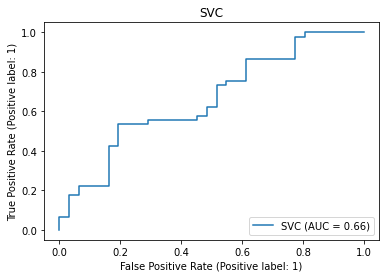

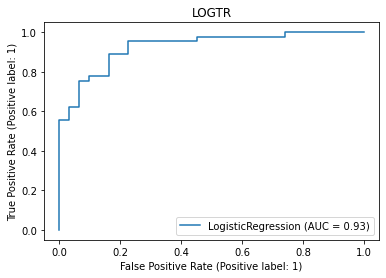

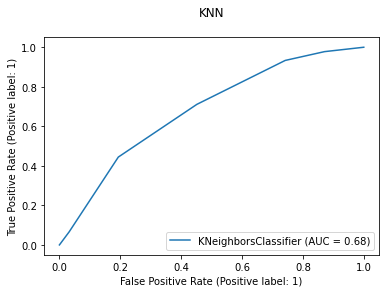

In [24]:
plot_roc_auc(list_of_models,X_test,y_test)

> ###### Logistics Regression Model is the best of them in terms of AUC=**93%**, F1_SCORE=**86%** and ACC=**84%**

# Try To Improve `SVC`,`KNN` By Using `GridSearch()`



### SVM

In [47]:
parm={"kernel":["linear", "poly", "rbf", "sigmoid"],"degree":np.arange(1,10,1),'C':np.linspace(0.1,1,10)}
model_svm_grid=GridSearchCV(model_svc,parm,cv=10)
model_svm_grid.fit(X_train,y_train)


model_svm_grid.best_params_

{'C': 0.1, 'degree': 1, 'kernel': 'linear'}


 Accuracy =0.8552631578947368 
 F1_Score=0.8842105263157894 
 recall=0.9333333333333333 
 precs=0.84 
 Conf_Matrix=[[23  8]
 [ 3 42]]


(0.8552631578947368,
 0.8842105263157894,
 0.9333333333333333,
 0.84,
 array([[23,  8],
        [ 3, 42]], dtype=int64))

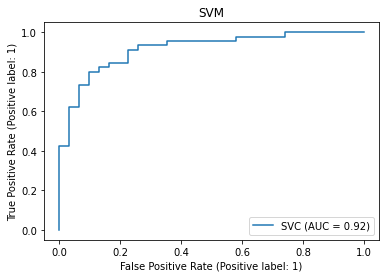

In [49]:
metrics.plot_roc_curve(model_svm_grid.best_estimator_, X_test, y_test) 
plt.title('SVM')
Metrcis(model_svm_grid.predict(X_test),y_test,prnt=True)

### KNN

In [45]:

parm={"leaf_size":np.arange(1,50),"n_neighbors":np.arange(1,30)}
model_knn_grid=GridSearchCV(model_knn,parm,cv=10)
model_knn_grid.fit(X_train,y_train)

model_knn_grid.best_params_

{'leaf_size': 1, 'n_neighbors': 11}


 Accuracy =0.6447368421052632 
 F1_Score=0.7032967032967032 
 recall=0.7111111111111111 
 precs=0.6956521739130435 
 Conf_Matrix=[[17 14]
 [13 32]]


(0.6447368421052632,
 0.7032967032967032,
 0.7111111111111111,
 0.6956521739130435,
 array([[17, 14],
        [13, 32]], dtype=int64))

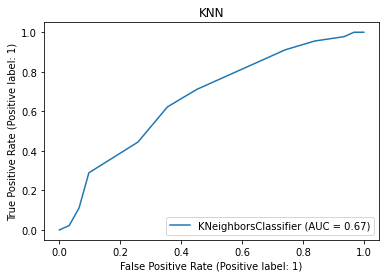

In [46]:
metrics.plot_roc_curve(model_knn_grid.best_estimator_, X_test, y_test) 
plt.title('KNN')
Metrcis(model_knn_grid.predict(X_test),y_test,prnt=True)

|          | Logestic | Fine Tuned SVM | Fine Tuned KNN |
|----------|----------|-----|-----|
| Acc      | 84%      | **`85%`** | 64% |
| F1_score | 86%      | **`88%`** | 70% |
| AUC      | 93%      | 92% | 67% |



> ###### SVC after Fine Tune it is Acc Has Been Improved 